In [ ]:
# How many stacked exposures are required for a detection as a function of distance? 

In [5]:
# Imports and setup
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
import os
from astropy.io import fits
from astropy.table import Table, QTable
from astroduet.background import background_pixel_rate
from astroduet.config import Telescope
from astroduet.utils import duet_abmag_to_fluence
from astroduet.image_utils import construct_image, estimate_background, find
from astroduet.diff_image import py_zogy, calculate_diff_image
from astroduet.lightcurve import get_lightcurve, lightcurve_through_image

# Telescope parameters
duet = Telescope()
[bgd_band1, bgd_band2] = background_pixel_rate(duet, low_zodi = True)
psf_fwhm_pix = duet.psf_fwhm / duet.pixel

# Simulation parameters
start_times = np.array([1800,3000,4200]) * u.s   # 30,50,70 minutes in seconds
distances = np.array([100,150,200,250,300]) * u.Mpc
frame = np.array([30,30])
exposure = 300 * u.s
psf_array = duet.psf_model(x_size=5,y_size=5).array

# 6 is oversampling used in construct_image() 
# - to-do: update sim_galaxy to accept r_eff in arcsec rather than pixels, so we can be agnostic about oversampling
oversample = 6
r_eff_init = 16.5/(duet.pixel.value/oversample) # Average r_eff for spiral galaxy at 100 Mpc, in pixels


In [5]:
# Generate the directories of images you need. 
# Creates duet-astro/notebooks/debug_imgs directory, lightcurve image tables are in individual directories beneath.
# ***WARNING***: this generates *90* directories, around ~12MB each (~1GB total)
# It takes ~15 minutes per distance to run, about 1 hr 15m in total
# Want to download the data as generated below if you haven't made any changes? 
# Grab it from my Dropbox here: https://www.dropbox.com/sh/8gk0xemb2zehrc8/AAAgHqR6donORB2-594xsX1ba?dl=0

# Loop through distances
for distance in distances:
    
    r_eff = r_eff_init * ((100*u.Mpc)**2 / distance**2) # r_eff for spiral galaxy at distance, in pixels
    r_eff = r_eff.value
    
    # Loop through three different source positions: r_eff*2, r_eff, r_eff/2
    for x_0, pos in zip([r_eff*2, r_eff, r_eff/2], [1,2,3]):
        # Surface brightness is independent of distance, set to 24 mag/arcsec**2
        gal_params = {'magnitude': 24, 'r_eff': r_eff, 'n': 1, 'theta': 0, 'ellip': 0.5, 'x_0': x_0, 'y_0': 0}

        # Loop through different start times (end after 1 day - we're not going to need more than that)
        end_time = 86400. * u.s
        for start_time in start_times:
            
            observing_windows = np.array([[start_time.to(u.s).value,end_time.to(u.s).value]]) * u.s
            file_suffix = "_{}Mpc_pos{}_{}s".format(np.int(distance.value),pos,np.int(start_time.value))

            # Get lightcurve through images with debug on so it's storing files
            lightcurve_shock = get_lightcurve("shock_5e10.dat", distance=distance, exposure=exposure, duet=duet,
                                              observing_windows=observing_windows)
            im_lightcurve_shock = lightcurve_through_image(lightcurve_shock, exposure=exposure, frame=frame, duet=duet,
                                                           gal_type='custom', gal_params=gal_params,
                                                           debug=True, debugfilename='shock'+file_suffix)
            
            lightcurve_blukn = get_lightcurve("kilonova_0.04.dat", distance=distance, exposure=exposure, duet=duet,
                                              observing_windows=observing_windows)
            im_lightcurve_blukn = lightcurve_through_image(lightcurve_blukn, exposure=exposure, frame=frame, duet=duet,
                                                           gal_type='custom', gal_params=gal_params,
                                                           debug=True, debugfilename='blukn'+file_suffix)
            
            print("Done: "+file_suffix)



INFO: Creating images [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _100Mpc_pos1_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _100Mpc_pos1_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


Done: _100Mpc_pos1_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


Done: _100Mpc_pos2_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


Done: _100Mpc_pos2_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _100Mpc_pos2_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


Done: _100Mpc_pos3_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _100Mpc_pos3_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


Done: _100Mpc_pos3_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _150Mpc_pos1_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _150Mpc_pos1_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _150Mpc_pos1_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _150Mpc_pos2_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _150Mpc_pos2_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _150Mpc_pos2_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _150Mpc_pos3_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _150Mpc_pos3_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _150Mpc_pos3_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _200Mpc_pos1_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


Done: _200Mpc_pos1_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _200Mpc_pos1_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


Done: _200Mpc_pos2_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _200Mpc_pos2_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _200Mpc_pos2_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _200Mpc_pos3_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _200Mpc_pos3_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _200Mpc_pos3_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _250Mpc_pos1_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


Done: _250Mpc_pos1_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]


/anaconda3/lib/python3.6/site-packages/photutils/psf/photometry.py:432: RuntimeWarning: invalid value encountered in sqrt
  self.fitter.fit_info['param_cov'])


Done: _250Mpc_pos1_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _250Mpc_pos2_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _250Mpc_pos2_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _250Mpc_pos2_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _250Mpc_pos3_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _250Mpc_pos3_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _250Mpc_pos3_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _300Mpc_pos1_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _300Mpc_pos1_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _300Mpc_pos1_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _300Mpc_pos2_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _300Mpc_pos2_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _300Mpc_pos2_4200s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _300Mpc_pos3_1800s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _300Mpc_pos3_3000s
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
INFO: Creating images [astroduet.lightcurve]


INFO: Constructing reference images [astroduet.lightcurve]
INFO: Finding source in integrated diff image [astroduet.lightcurve]
INFO: Measuring fluxes and creating light curve [astroduet.lightcurve]
Done: _300Mpc_pos3_4200s


In [22]:
# Now that we have the files, loop through them, adding them until we reach a detection threshold of 5 sigma
debugdir = os.path.join(os.getcwd(), 'debug_imgs')

results = Table(names=('distance', 'pos', 'start_time', 'model', 'num_exp'), 
                dtype=('i2', 'i2', 'f2', 'S5', 'i2'))

# Loop through distances
for distance in distances:
    
    r_eff = r_eff_init * ((100*u.Mpc)**2 / distance**2) # r_eff for spiral galaxy at distance, in pixels
    r_eff = r_eff.value
    
    # Loop through three different source positions: r_eff*2, r_eff, r_eff/2, called 1, 2, 3
    for x_0, pos in zip([r_eff*2, r_eff, r_eff/2], [1,2,3]):
        
        # Galaxy parameters
        gal_params = {'magnitude': 24, 'r_eff': r_eff, 'n': 1, 'theta': 0, 'ellip': 0.5, 'x_0': x_0, 'y_0': 0}
        
        # Generate combined reference image for this galaxy/source setup
        nexp = 5
        ref_image1 = construct_image(frame, exposure, duet=duet, band=duet.bandpass1,
                                     gal_type='custom', gal_params=gal_params, sky_rate=bgd_band1, n_exp=nexp)
        ref_image2 = construct_image(frame, exposure, duet=duet, band=duet.bandpass2,
                                     gal_type='custom', gal_params=gal_params, sky_rate=bgd_band2, n_exp=nexp)
        total_ref_rate = (ref_image1 + ref_image2) / (exposure * 2 * nexp)
        ref_bkg, ref_bkg_rms_median = estimate_background(total_ref_rate, method='1D', sigma=2)
        ref_bkgsub = total_ref_rate - ref_bkg
        
        # Loop through different start times
        for start_time in start_times:
            # Loop through different models
            for mod in ['shock','blukn']:
            
                # Grab the lightcurve files we need 
                name = '{}_{}Mpc_pos{}_{}s'.format(mod,np.int(distance.value),pos,np.int(start_time.value))
                table = Table.read(os.path.join(debugdir,name,name+'.hdf5'))

                # Loop through images, summing until we get a detection
                img_sum = np.zeros(frame) * u.ph / u.s
                for row in table:
                    # Add both bands and add them to total summed image
                    img_sum += (row['imgs_D1'] + row['imgs_D2']) * u.ph / u.s

                    # Convert to average rate
                    num_exp = row.index+1
                    img_rate = img_sum / (2 * num_exp)

                    # Estimate background
                    img_bkg, img_bkg_rms_median = estimate_background(img_rate, method='1D', sigma=2)
                    img_bkgsub = img_rate - img_bkg

                    # Make difference image
                    diff_image = calculate_diff_image(img_rate, img_bkgsub, total_ref_rate, ref_bkgsub)

                    # Run find - do we detect an image to 5 sigma?
                    star_tbl, bkg_image, threshold = find(diff_image,psf_fwhm_pix.value,method='peaks',background='1D')

                    if star_tbl[(star_tbl['x'] == (frame[0]//2)) & (star_tbl['y'] == (frame[1]//2))]: 
                        # Source successfully found! End loop
                        break
                
                # Store the number of exposures that were required to detect the source in this setup
                results.add_row((distance, pos, start_time, mod, num_exp))

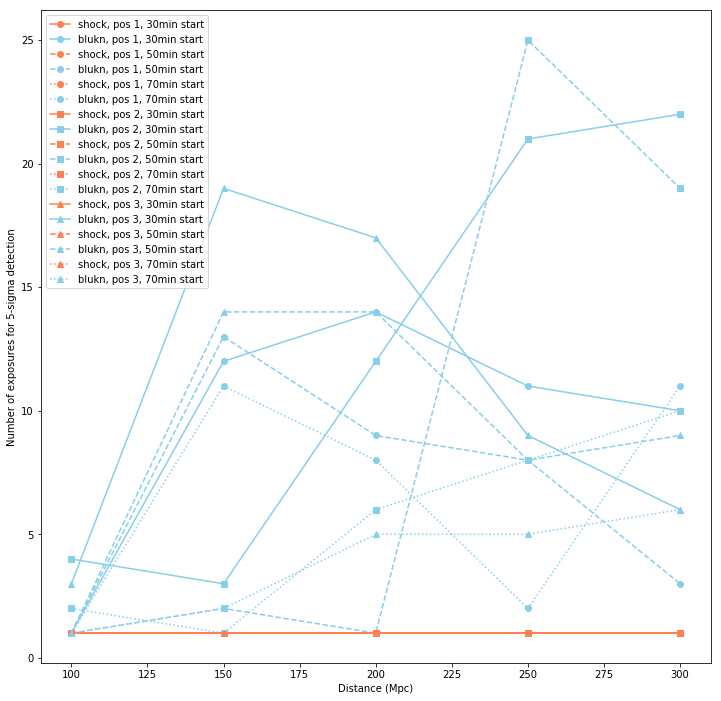

In [28]:
# Results plots - number of exposures vs distance for different models, start times, source positions
plt.figure(figsize=(12,12))

# Loop through three different source positions
for pos,m in zip([1,2,3],['o','s','^']):
    # Loop through different start times
    for start_time, ls in zip(start_times,['-','--',':']):
        # Loop through different models
        for mod, col in zip(['shock','blukn'],['coral','skyblue']):

            mask = (results['pos'] == pos) & \
                   (results['start_time'] == np.int(start_time.value)) & \
                   (results['model'] == mod)
            
            dist = results[mask]['distance']
            num = results[mask]['num_exp']
            
            plt.plot(dist,num,marker=m,color=col,linestyle=ls,
                     label='{}, pos {}, {}min start'.format(mod,pos,np.int(start_time.to(u.min).value)))

plt.xlabel('Distance (Mpc)')
plt.ylabel('Number of exposures for 5-sigma detection')
plt.legend()


In [ ]:
# Notes: 
# Why does it take more exposures to detect blue kilnovae out to ~150 Mpc than 300 Mpc? 
# - Maybe this is related to how extended the underlying galaxy ends up being?
# - Possibly bad Sersic profiles at high distance??
# For more statistical results, repeat each set-up multiple times and give average number of exposures required
# - don't have to generate lightcurves out to a day though! That was definitely overkill.